In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
# Disable warnings
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

In [3]:
data = pd.read_csv("electricity.csv")

In [4]:
data

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,01/11/2011 00:00,None,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.00,9.30,600.71,356.00,3159.60,54.32
1,01/11/2011 00:30,None,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.00,11.10,605.42,317.00,2973.01,54.23
2,01/11/2011 01:00,None,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.00,11.10,589.97,311.00,2834.00,54.23
3,01/11/2011 01:30,None,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.00,9.30,585.94,313.00,2725.99,53.47
4,01/11/2011 02:00,None,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.00,11.10,571.52,346.00,2655.64,39.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38009,31/12/2013 21:30,New Year's Eve,1,1,1,31,12,2013,43,1179.14,3932.22,34.51,6.00,22.20,285.31,812.0,3692.95,42.45
38010,31/12/2013 22:00,New Year's Eve,1,1,1,31,12,2013,44,1152.01,3821.44,33.83,5.00,24.10,278.31,852.0,3571.0,33.83
38011,31/12/2013 22:30,New Year's Eve,1,1,1,31,12,2013,45,1123.67,3724.21,31.75,4.00,20.40,280.91,962.0,3460.29,31.75
38012,31/12/2013 23:00,New Year's Eve,1,1,1,31,12,2013,46,1094.24,3638.16,33.83,5.00,14.80,302.46,950.0,3563.99,50.6


In [5]:
data["ForecastWindProduction"] = pd.to_numeric(data["ForecastWindProduction"], errors= 'coerce')
data["SystemLoadEA"] = pd.to_numeric(data["SystemLoadEA"], errors= 'coerce')
data["SMPEA"] = pd.to_numeric(data["SMPEA"], errors= 'coerce')
data["ORKTemperature"] = pd.to_numeric(data["ORKTemperature"], errors= 'coerce')
data["ORKWindspeed"] = pd.to_numeric(data["ORKWindspeed"], errors= 'coerce')
data["CO2Intensity"] = pd.to_numeric(data["CO2Intensity"], errors= 'coerce')
data["ActualWindProduction"] = pd.to_numeric(data["ActualWindProduction"], errors= 'coerce')
data["SystemLoadEP2"] = pd.to_numeric(data["SystemLoadEP2"], errors= 'coerce')
data["SMPEP2"] = pd.to_numeric(data["SMPEP2"], errors= 'coerce')

In [6]:
data.isnull().sum()

DateTime                    0
Holiday                     0
HolidayFlag                 0
DayOfWeek                   0
WeekOfYear                  0
Day                         0
Month                       0
Year                        0
PeriodOfDay                 0
ForecastWindProduction      5
SystemLoadEA                2
SMPEA                       2
ORKTemperature            295
ORKWindspeed              299
CO2Intensity                7
ActualWindProduction        5
SystemLoadEP2               2
SMPEP2                      2
dtype: int64

In [7]:
data = data.dropna()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37682 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DateTime                37682 non-null  object 
 1   Holiday                 37682 non-null  object 
 2   HolidayFlag             37682 non-null  int64  
 3   DayOfWeek               37682 non-null  int64  
 4   WeekOfYear              37682 non-null  int64  
 5   Day                     37682 non-null  int64  
 6   Month                   37682 non-null  int64  
 7   Year                    37682 non-null  int64  
 8   PeriodOfDay             37682 non-null  int64  
 9   ForecastWindProduction  37682 non-null  float64
 10  SystemLoadEA            37682 non-null  float64
 11  SMPEA                   37682 non-null  float64
 12  ORKTemperature          37682 non-null  float64
 13  ORKWindspeed            37682 non-null  float64
 14  CO2Intensity            37682 non-null

In [9]:
data.describe()

,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
count,37682.000000,37682.000000,37682.000000,37682.000000,37682.000000,37682.000000,37682.000000,37682.000000,37682.000000,37682.000000,37682.000000,37682.000000,37682.000000,37682.000000,37682.000000,37682.000000
mean,0.037578,2.998355,28.044584,15.707181,6.886789,2012.386577,23.508651,542.871513,4020.753657,62.747428,9.628443,19.209721,479.519761,519.814951,3787.560062,64.181344
std,0.190175,1.998845,15.552428,8.804424,3.566915,0.623780,13.854822,413.725304,860.148265,32.300069,4.439757,9.569069,85.170896,377.879680,842.544909,35.432265
min,0.000000,0.000000,1.000000,1.000000,1.000000,2011.000000,0.000000,0.680000,2183.940000,0.000000,-4.000000,0.000000,0.000000,1.000000,1809.960000,-47.740000
25%,0.000000,1.000000,14.000000,8.000000,4.000000,2012.000000,12.000000,188.927500,3281.780000,45.540000,6.000000,13.000000,421.275000,198.000000,3060.215000,45.800000
50%,0.000000,3.000000,29.000000,16.000000,7.000000,2012.000000,24.000000,440.645000,4105.530000,55.230000,9.000000,18.500000,480.350000,444.000000,3867.220000,55.560000
75%,0.000000,5.000000,43.000000,23.000000,10.000000,2013.000000,36.000000,837.182500,4638.982500,70.320000,13.000000,24.100000,537.540000,792.000000,4427.822500,72.120000
max,1.000000,6.000000,52.000000,31.000000,12.000000,2013.000000,47.000000,1680.000000,6492.910000,587.580000,25.000000,75.900000,842.880000,1769.000000,6309.750000,1000.000000


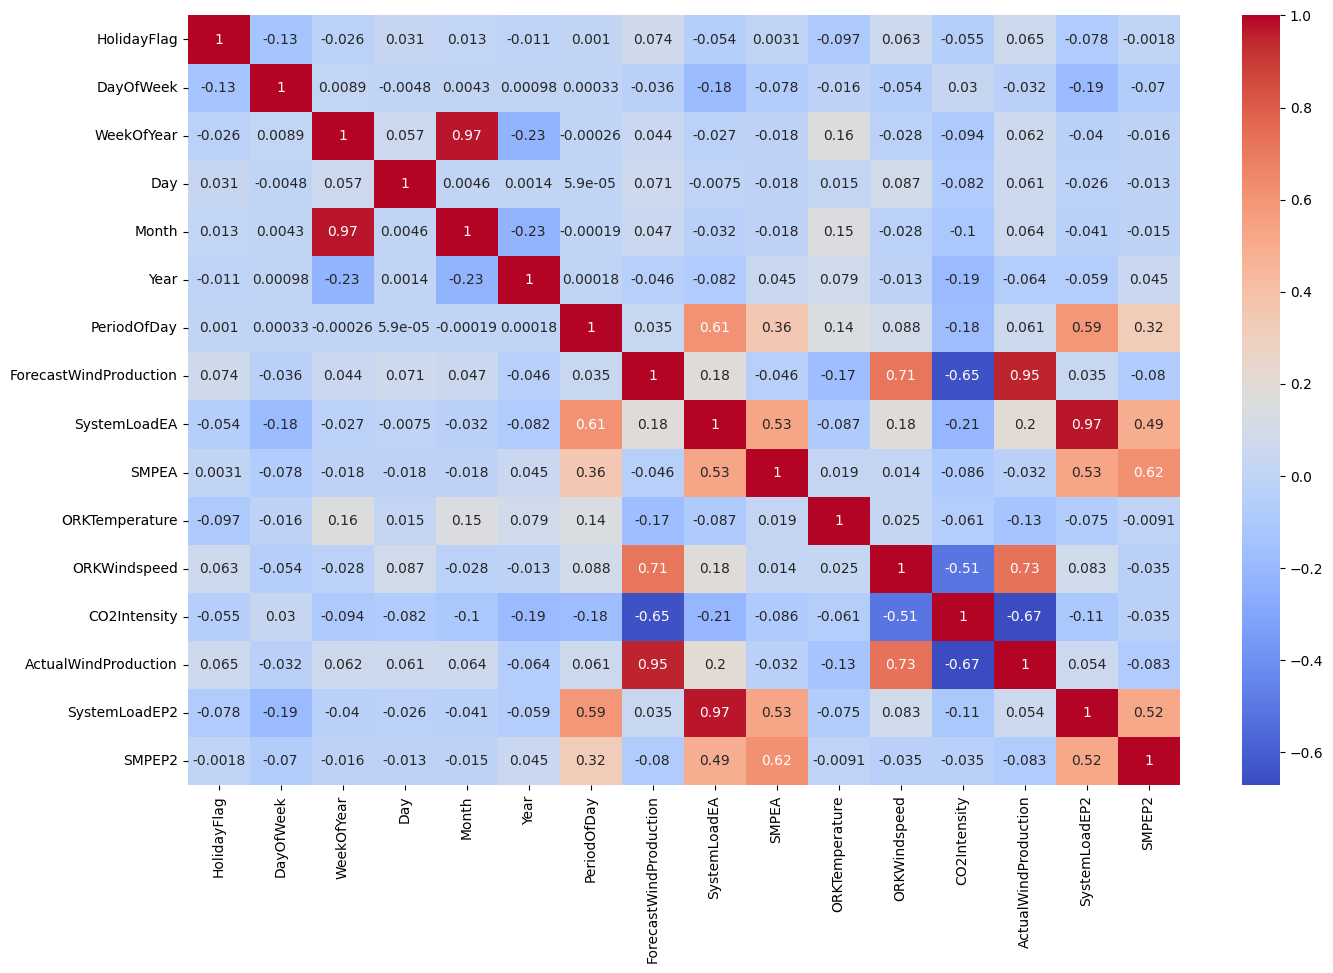

In [10]:
plt.figure(figsize = (16, 10))
sns.heatmap(data.corr(), cmap = 'coolwarm', annot=True)
plt.show()

In [11]:
x = np.array(data[["Day", "Month", "ForecastWindProduction", "SystemLoadEA", 
          "SMPEA", "ORKTemperature", "ORKWindspeed", "CO2Intensity", 
          "ActualWindProduction", "SystemLoadEP2"]])
y = np.array(data["SMPEP2"])

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(x,
                                               y,
                                               test_size = 0.1,
                                               random_state = 42)

In [13]:
model1 = RandomForestRegressor()
model1.fit(xtrain, ytrain)
model1.score(xtrain, ytrain)

0.9443846141262413

In [14]:
model2 = DecisionTreeRegressor()
model2.fit(xtrain, ytrain)
model2.score(xtrain, ytrain)

1.0

In [15]:
# Perform cross-validation
cv_scores_model1 = cross_val_score(model1, xtrain, ytrain, cv=5)
cv_scores_model2 = cross_val_score(model2, xtrain, ytrain, cv=5)

# Print cross-validation scores
print("Cross-validation scores (RandomForestRegressor):", cv_scores_model1)
print("Mean CV score (RandomForestRegressor):", np.mean(cv_scores_model1))

print("Cross-validation scores (DecisionTreeRegressor):", cv_scores_model2)
print("Mean CV score (DecisionTreeRegressor):", np.mean(cv_scores_model2))

Cross-validation scores (RandomForestRegressor): [0.53618267 0.56717624 0.58730044 0.60559431 0.55176935]
Mean CV score (RandomForestRegressor): 0.5696046013605449
Cross-validation scores (DecisionTreeRegressor): [ 0.27318049  0.14186954  0.13790126  0.28684278 -0.08544424]
Mean CV score (DecisionTreeRegressor): 0.15086996775016828


#### After analyzing the cross-validation results, it has been determined that the RandomForestRegressor model outperforms the DecisionTreeRegressor model. Therefore, it is recommended to choose the RandomForestRegressor.

In [16]:
features = np.array([[10, 12, 54.10, 4241.05, 49.56, 9.0, 14.8, 491.32, 54.0, 4426.84]])
print(f"Random Forest Prediction: {model1.predict(features)[0]}")

Random Forest Prediction: 68.01520000000002
